In [1]:
import os

os.chdir('C:/MSBA/Summer 2020/2205-INSY-5378-Data Science/Spam-NoSpam/')

In [2]:
def create_data(folder, alist):
    files = glob.glob(folder + '/*txt')
    for file in files: 
        with open(file) as infile: 
            alist.append(infile.read())

In [4]:
import glob as glob 

nonspam_train = []
nonspam_test = []
spam_train = []
spam_test = []

create_data('nonspam-train', nonspam_train)
create_data('nonspam-test', nonspam_test)
create_data('spam-train', spam_train)
create_data('spam-test', spam_test)

print(len(nonspam_train), len(nonspam_test), len(spam_train), len(spam_test)) 

350 130 350 130


In [5]:
import numpy as np

x_train = nonspam_train + spam_train
x_test = nonspam_test + spam_test

y_train = list(np.zeros(len(nonspam_train))) + list(np.ones(len(spam_train)))
y_test = list(np.zeros(len(nonspam_test))) + list(np.ones(len(spam_test)))

print(len(x_train), len(x_test), len(y_train), len(y_test))

700 260 700 260


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(x_train)
features_train_dense = features_train.todense()
features_train_dense.shape

(700, 19073)

In [51]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = 0.1)
model.fit(features_train_dense, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

 - fit -> Learn a vocabulary dictionary of all tokens in the raw documents
 - fit_transform -> Learn the vocabulary dictionary and return document-term matrix
 - transform -> Transform documents to document-term matrix

In [56]:
features_test = vectorizer.transform(x_test)
features_test_dense = features_test.todense()
features_test_dense.shape

(260, 19073)

In [58]:
y_pred = model.predict(features_test_dense)
y_pred.shape

(260,)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n ", classification_report(y_test, y_pred, target_names = ['No-Spam', 'Spam']))

Accuracy Score:  0.9769230769230769

Confusion Matrix:
 [[126   4]
 [  2 128]]

Classification Report:
                precision    recall  f1-score   support

     No-Spam       0.98      0.97      0.98       130
        Spam       0.97      0.98      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260



In [79]:
from sklearn.metrics import precision_recall_curve, auc

y_pred_prob = model.predict_proba(features_test_dense)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

area = auc(recall, precision)
print('Area under Curve: %0.2f' % area)

Area under Curve: 0.99


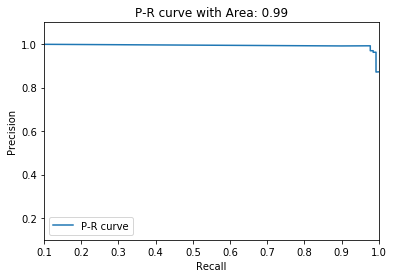

In [84]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, label = 'P-R curve')
plt.legend(loc = 'lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.1, 1.0])
plt.ylim([0.1, 1.1])
plt.title('P-R curve with Area: %0.2f' % area)
plt.show()

In [85]:
test_input = vectorizer.transform(["success guaranteed only few dollars"])
model.predict(test_input)

array([1.])

In [86]:
test_input = vectorizer.transform(["conference for information systems and telecom"])
model.predict(test_input)

array([0.])

In [8]:
x_train[0:10]

['posting hi m work phonetics project modern irish m hard source anyone recommend book article english specifically interest palatal slender consonant work helpful too thank laurel sutton sutton garnet berkeley edu ',
 're help re iaupe hay alguien que sepa como se puede comunicar con lo ordenadore de la universidad de texa es que busco informacus sobre el programa de educacus bile de lo distinto condado que forman la ciudad de austin y area limitrofe gracia brett ',
 'proofread medieval e text humanist discussion group vol monday apr seek volunteer proofread transcription attach list medieval text prepare archivo digital de manuscrito y texto espan ole admyte cdrom disk publish summer sociedad estatal quinto centenario addition several hundr medieval text transcribe accord norm manual manuscript transcription dictionary old spanish language th ed madison disk contain special version tact text analysis retrieval program u toronto bibliography old spanish text unite program computerassi

  (0, 13076)	1
  (0, 7349)	1
  (0, 18708)	2
  (0, 12752)	1
  (0, 13405)	1
  (0, 10903)	1
  (0, 8409)	1
  (0, 7119)	1
  (0, 15711)	1
  (0, 846)	1
  (0, 13912)	1
  (0, 1954)	1
  (0, 1031)	1
  (0, 5194)	1
  (0, 15777)	1
  (0, 8248)	1
  (0, 12328)	1
  (0, 15527)	1
  (0, 3368)	1
  (0, 7276)	1
  (0, 17055)	1
  (0, 16792)	1
  (0, 9455)	1
  (0, 16379)	2
  (0, 6450)	1
  :	:
  (699, 6685)	1
  (699, 17368)	1
  (699, 15765)	1
  (699, 5130)	1
  (699, 13537)	1
  (699, 551)	1
  (699, 16785)	1
  (699, 1838)	1
  (699, 1542)	1
  (699, 6967)	1
  (699, 8169)	1
  (699, 15550)	1
  (699, 9632)	1
  (699, 9709)	1
  (699, 5301)	1
  (699, 13429)	1
  (699, 12007)	1
  (699, 17123)	1
  (699, 17797)	1
  (699, 3695)	1
  (699, 14228)	2
  (699, 10275)	1
  (699, 13426)	1
  (699, 11271)	1
  (699, 17427)	1
